## Regression : PyTorch

### Random drug dosage v/s Forgetfulness

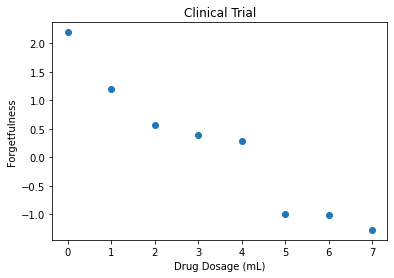

In [1]:
import torch
import matplotlib.pyplot as plt
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
y = -0.5*x + 2 + torch.normal(mean = torch.zeros(8), std = 0.2)
fig, ax = plt.subplots()
plt.title("Clinical Trial")
plt.xlabel('Drug Dosage (mL)')
plt.ylabel('Forgetfulness')
_ = ax.scatter(x, y)

### Initialize slope with random value m = 0.9 and intercept b = 0.1

In [2]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()
print(m, b)

tensor([0.9000], requires_grad=True) tensor([0.1000], requires_grad=True)


### Simple-most Regression Equation

In [3]:
#Define regression function
def regression(my_x, my_m, my_b):
    return my_m * my_x + my_b

In [4]:
yhat = regression(x, m, b)
print(yhat)

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)


## Simple function to plot regression

In [5]:
#Regression plot function
def regression_plot(my_x, my_y, my_m, my_b):
    fig, ax = plt.subplots()
    ax.scatter(my_x, my_y)
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b)
    y_max = regression(x_max, my_m, my_b)
    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

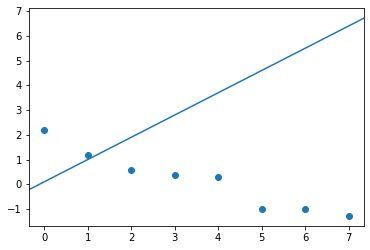

In [6]:
regression_plot(x, y, m, b)

In [7]:
def MSE(my_yhat, my_y):
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma / len(my_y)

In [8]:
C = MSE(yhat, y)
print(C)

tensor(19.5492, grad_fn=<DivBackward0>)


### Autodiff can be used here

In [9]:
C.backward()

In [10]:
m.grad

tensor([36.0404])

In [11]:
b.grad

tensor([6.1608])

## Gradient Descent (built-in)

In [13]:
optimizer = torch.optim.SGD([m, b], lr = 0.01)
optimizer.step()

In [14]:
[m, b]

[tensor([0.5396], requires_grad=True), tensor([0.0384], requires_grad=True)]

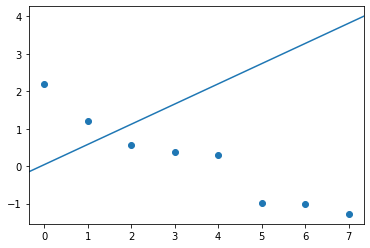

In [15]:
regression_plot(x, y, m, b)

In [16]:
C = MSE(regression(x, m, b), y)
print(C)

tensor(8.6129, grad_fn=<DivBackward0>)


### Iteratively move COST to Zero

In [17]:
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad() #Reset gradient to zero
    yhat = regression(x, m, b)      #Step # 1
    C = MSE(yhat, y)                #Step # 2
    C.backward()                    #Step # 3
    optimizer.step()                #Step # 4
    print('Epoch {}, cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(), '%.3g' % m.grad.item(), 
    '%.3g' % b.grad.item()))

Epoch 0, cost 8.61, m grad 23, b grad 3.51
Epoch 1, cost 4.18, m grad 14.7, b grad 1.83
Epoch 2, cost 2.39, m grad 9.43, b grad 0.769
Epoch 3, cost 1.65, m grad 6.07, b grad 0.0938
Epoch 4, cost 1.35, m grad 3.94, b grad -0.333
Epoch 5, cost 1.22, m grad 2.59, b grad -0.602
Epoch 6, cost 1.16, m grad 1.72, b grad -0.771
Epoch 7, cost 1.13, m grad 1.17, b grad -0.877
Epoch 8, cost 1.11, m grad 0.824, b grad -0.941
Epoch 9, cost 1.09, m grad 0.602, b grad -0.98
Epoch 10, cost 1.08, m grad 0.46, b grad -1
Epoch 11, cost 1.07, m grad 0.369, b grad -1.01
Epoch 12, cost 1.06, m grad 0.311, b grad -1.02
Epoch 13, cost 1.05, m grad 0.273, b grad -1.02
Epoch 14, cost 1.03, m grad 0.249, b grad -1.02
Epoch 15, cost 1.02, m grad 0.233, b grad -1.02
Epoch 16, cost 1.01, m grad 0.223, b grad -1.01
Epoch 17, cost 1, m grad 0.216, b grad -1.01
Epoch 18, cost 0.991, m grad 0.211, b grad -1
Epoch 19, cost 0.981, m grad 0.207, b grad -0.998
Epoch 20, cost 0.971, m grad 0.205, b grad -0.993
Epoch 21, cos

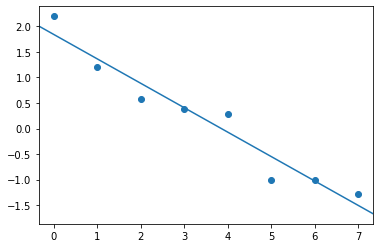

In [18]:
regression_plot(x, y, m, b)

In [19]:
[m.item(), b.item()]

[-0.47761261463165283, 1.8395379781723022]